# **Explore Weather Trends**

<center>
<img src="https://video.udacity-data.com/topher/2017/August/59a5d44f_earth/earth.png" width="546px" /></center>

## **Overview** 📝

---
In this project, I analyzed local in Riyadh and global temperature data and I compared the temperature trends local in Riyadh and global temperature trends.

I built a website through which the user chooses his city and shows it the city's data. The data is processed and the moving average of the user's city and the world is calculated, and his line chart is displayed and allowed to write his observations about the similarities and/or differences in the trends and then save the web page as a PDF file.

## **[DEMO](https://www.youtube.com/watch?v=i9sVUrlcGkY)**

It is was implemented using SQL, Python language, Pandas, Matplotlib, and Streamlit.

## **The Road Ahead** ⛳️

---
I break the notebook into separate steps.

-  STEP 1: Data Extraction.
-  STEP 2: Data Manipulation.
-  STEP 3: Data Visualization.
-  STEP 4: Observations.


## **Data Extraction** 🔍

---
I extracted data from a database using SQL query on the SQL Workspace in the Udacity classroom.

### **SQL query**
SQL query to retrieve the cities in Saudi Arabia in the `city_list` table. [Screenshot](https://github.com/AmalAljabri/Explore-Weather-Trends/blob/main/Images/img1.png)

     SELECT *
     FROM city_list
     WHERE country = 'Saudi Arabia';


SQL query to retrieve the average temperatures data for the city of Riyadh in the `city_data` table. [Screenshot](https://github.com/AmalAljabri/Explore-Weather-Trends/blob/main/Images/img2.png)

     SELECT year, avg_temp
     FROM city_data
     WHERE city = 'Riyadh';

SQL query to retrieve the average global temperatures in the `global_data` table. [Screenshot](https://github.com/AmalAljabri/Explore-Weather-Trends/blob/main/Images/img3.png)

     SELECT * 
     FROM global_data;




## **Data Manipulation** ⚙️

### **Read CSV Files and Removing missing values**

In [1]:
import pandas as pd

local_data = pd.read_csv("/content/local_data.csv")
global_data = pd.read_csv("/content/global_data.csv")


In [2]:
local_data = (local_data.dropna()).reset_index(drop=True)
local_data.head(20)

,year,avg_temp
0,1843,24.74
1,1844,15.45
2,1845,20.82
3,1848,24.56
4,1849,24.80
5,1850,24.34
6,1851,25.03
7,1852,24.85
8,1853,24.93
9,1854,24.72


In [3]:
global_data.head(20)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


### **Calculating Moving Averages**

In [4]:
local_data['ma_local'] = local_data['avg_temp'].rolling(window=20).mean()

global_data['ma_global'] = global_data['avg_temp'].rolling(window=20).mean()

In [5]:
local_data.tail(20)

,year,avg_temp,ma_local
149,1994,26.08,25.4760
150,1995,25.64,25.5060
151,1996,26.28,25.5715
152,1997,25.49,25.5465
153,1998,26.73,25.5855
154,1999,26.92,25.6215
155,2000,26.55,25.6575
156,2001,26.67,25.6935
157,2002,26.44,25.7845
158,2003,26.62,25.8730


In [6]:
global_data.tail(20)

,year,avg_temp,ma_global
246,1996,9.04,8.9465
247,1997,9.20,8.9640
248,1998,9.52,9.0055
249,1999,9.29,9.0335
250,2000,9.20,9.0445
251,2001,9.41,9.0565
252,2002,9.57,9.1030
253,2003,9.53,9.1280
254,2004,9.32,9.1595
255,2005,9.70,9.2115


## **Data Visualization**  📈

### **Creating a Line Chart Without Moving Averages**

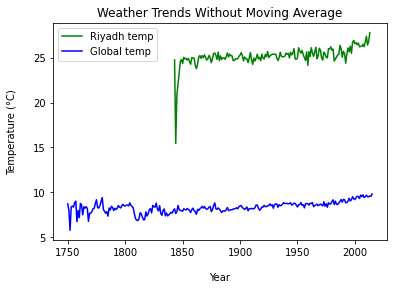

In [7]:
import matplotlib.pyplot as plt

plt.plot(local_data['year'], 
         local_data['avg_temp'], 
         label='Riyadh temp', color= 'g')
plt.plot(global_data['year'], 
         global_data['avg_temp'], 
         label='Global temp', color= 'b')
plt.legend()
plt.title('Weather Trends Without Moving Average')
plt.xlabel('\nYear')
plt.ylabel('Temperature (°C)\n')
plt.show()

### **Creating a Line Chart With Moving Averages**

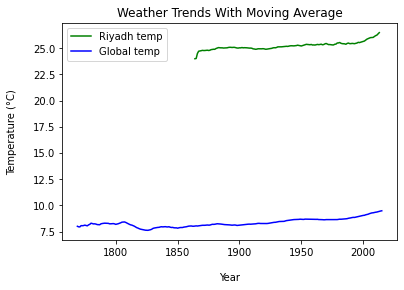

In [8]:
plt.plot(local_data['year'], 
         local_data['ma_local'], 
         label='Riyadh temp', color= 'g')
plt.plot(global_data['year'], 
         global_data['ma_global'], 
         label='Global temp', color= 'b')
plt.legend()
plt.title('Weather Trends With Moving Average')
plt.xlabel('\nYear')
plt.ylabel('Temperature (°C)\n')
plt.show()

## **Observations** ✍🏻

---
- The average temperature in Riyadh ranges from 24°C to 27°C, while the average world temperature ranges from 6°C to 9°C.

- The average temperature of Riyadh is hotter than the average temperature in the world.

- I note that the changes in the average temperatures of Riyadh and the average temperatures of the world have changed similarly.

- According to the line chart, the overall trend was consistent over a long period.

- In the coming years, the average temperature will increase in both Riyadh and the world.



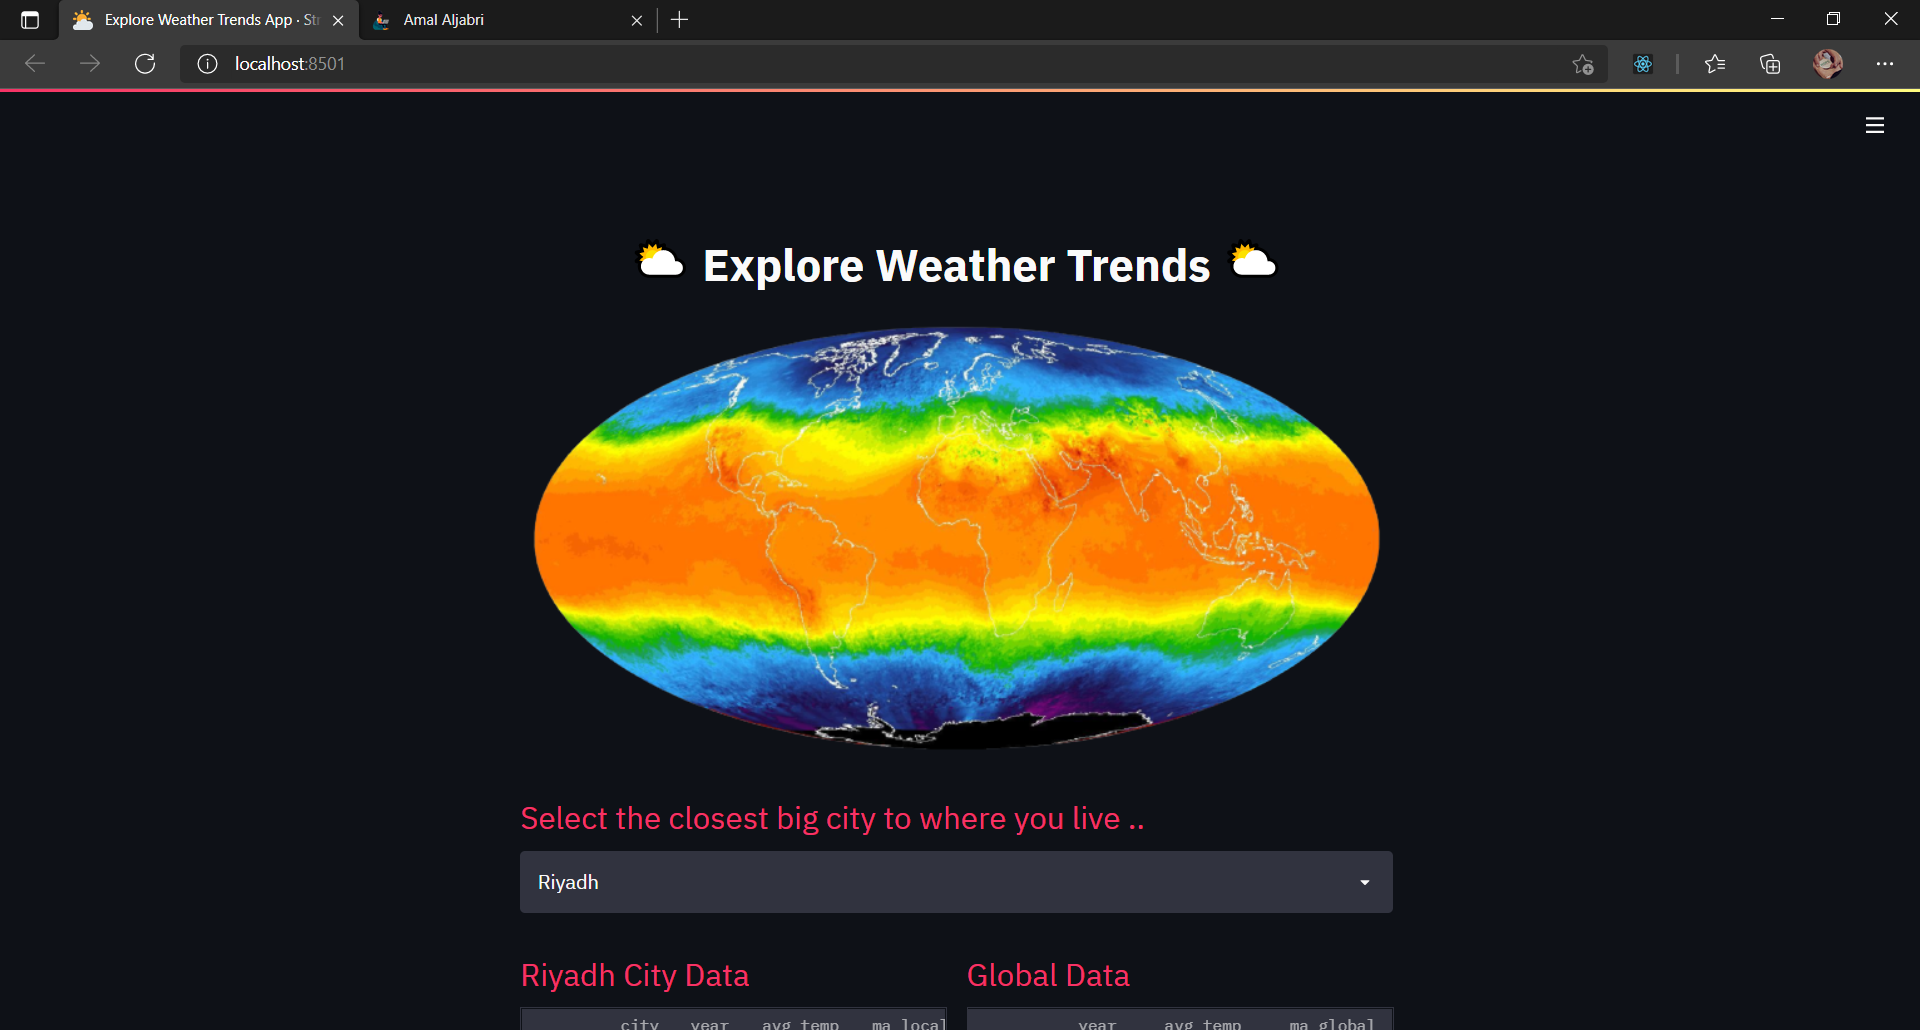

In [9]:
from IPython.display import Image
Image(filename='/content/Img_App_1.png', height=400)

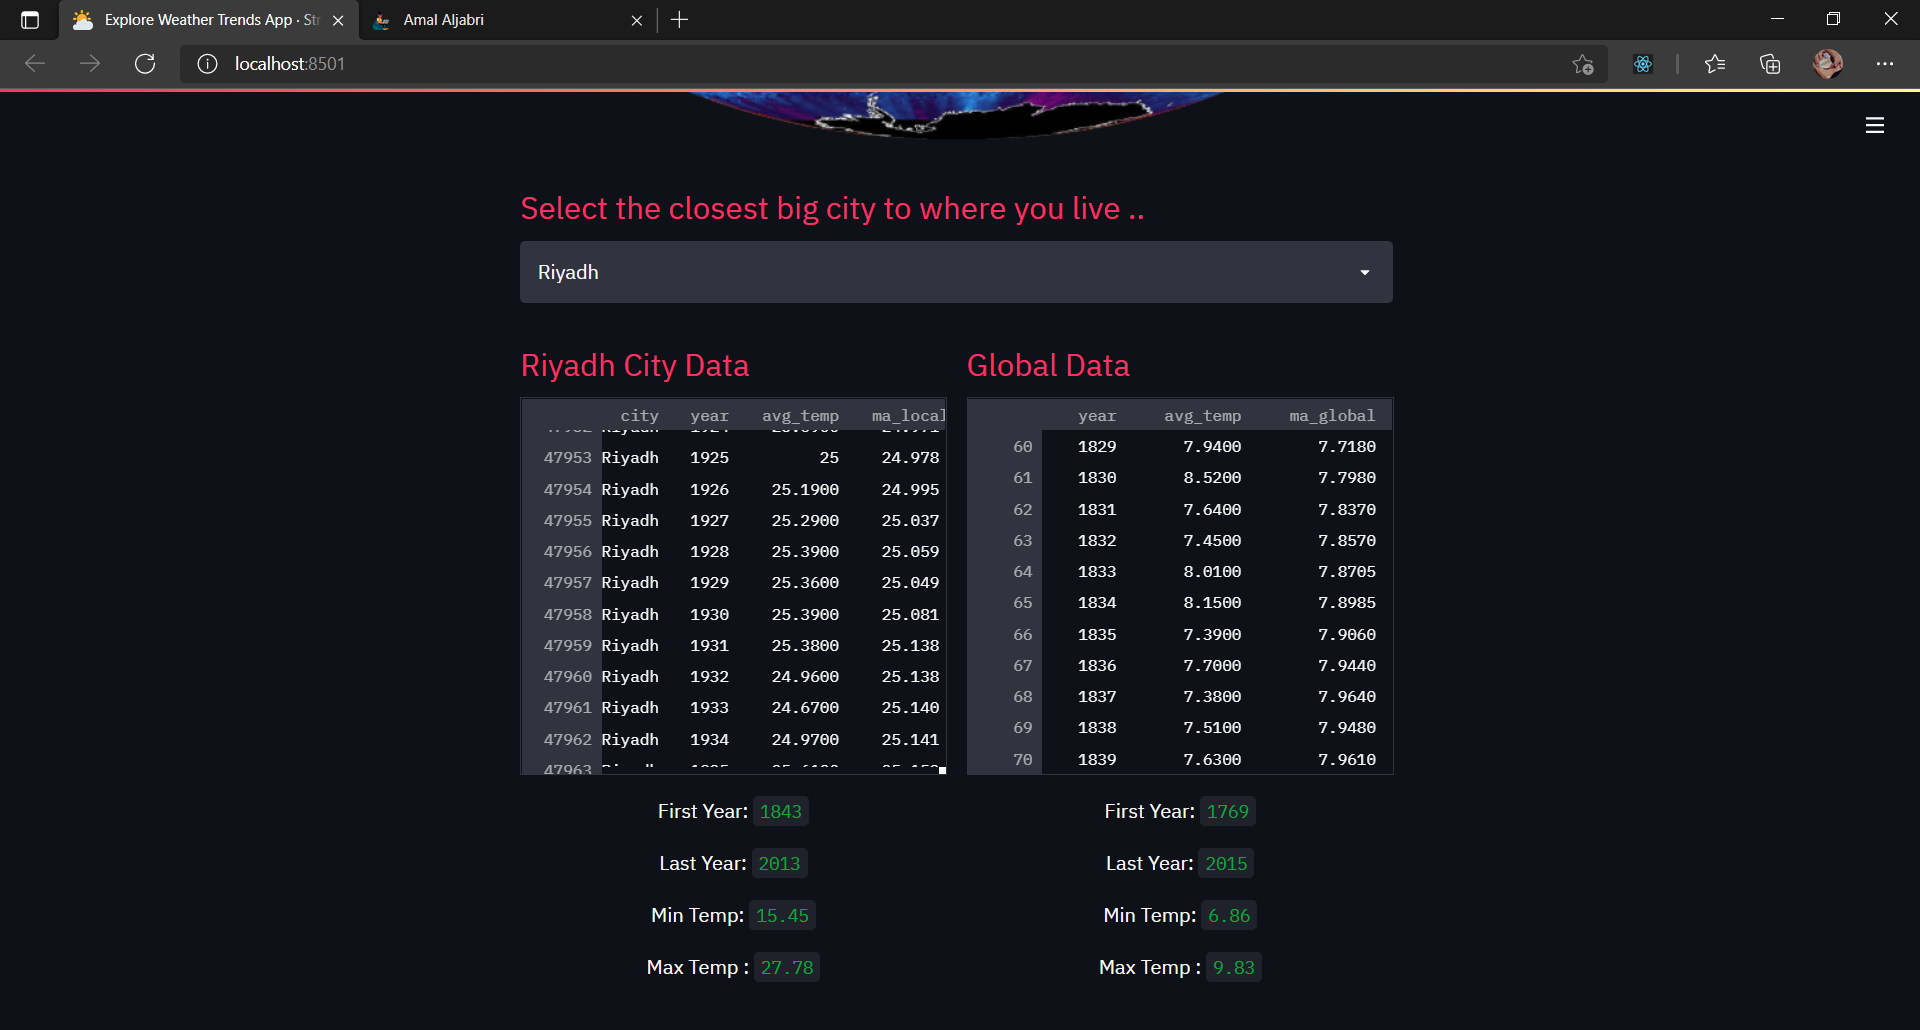

In [10]:
Image(filename='/content/Img_App_2.png', height=400)

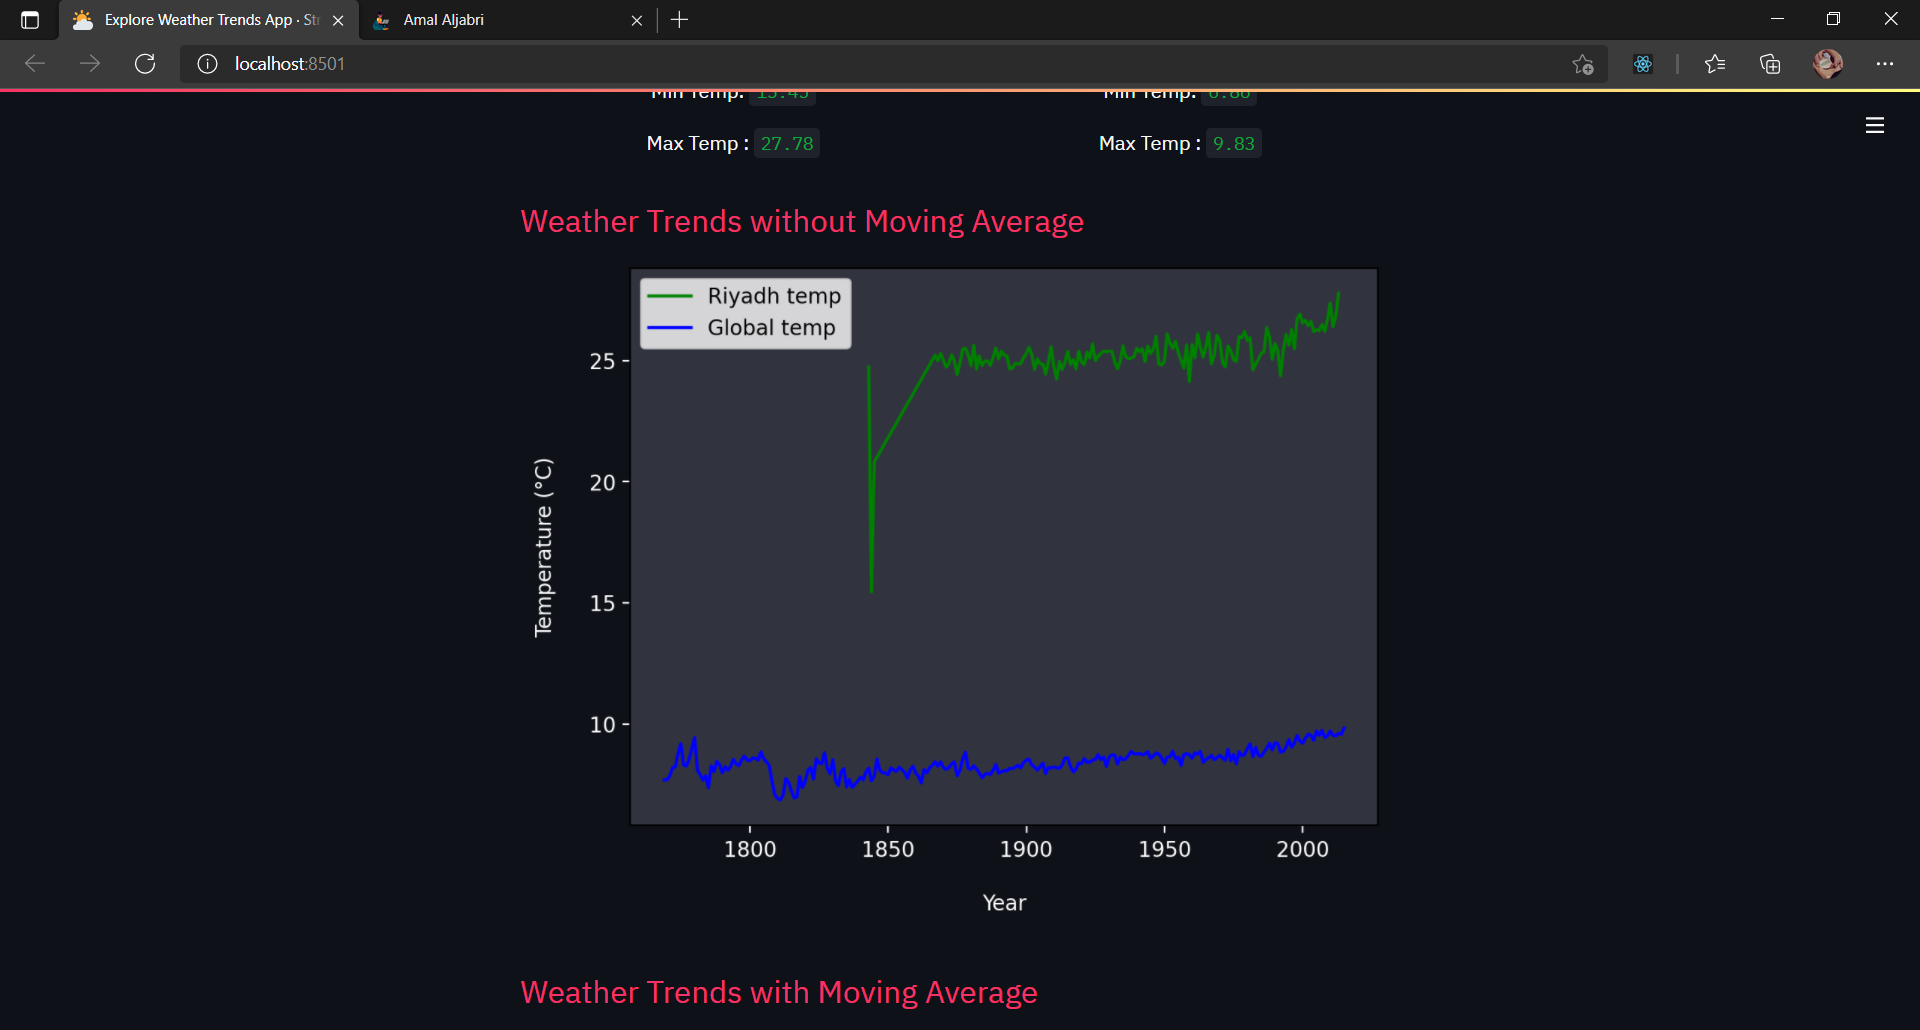

In [11]:
Image(filename='/content/Img_App_3.png', height=400)

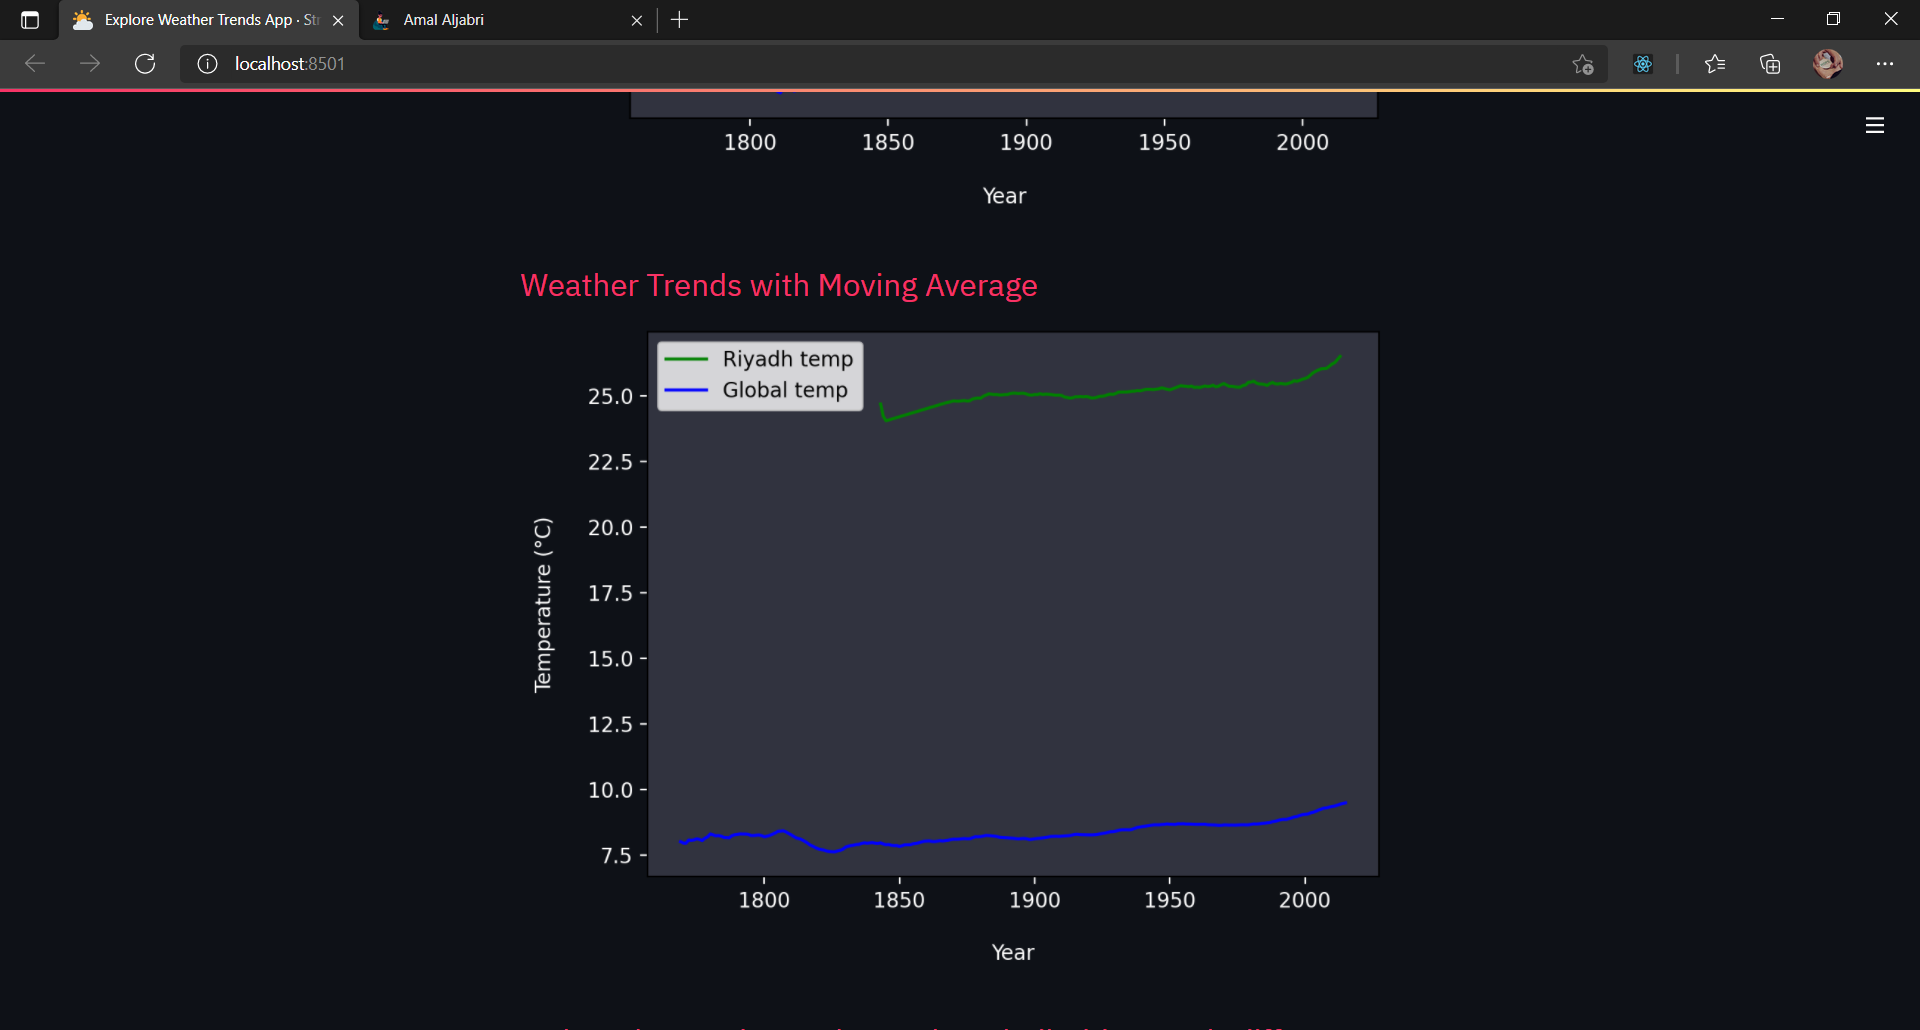

In [12]:
Image(filename='/content/Img_App_4.png', height=400)

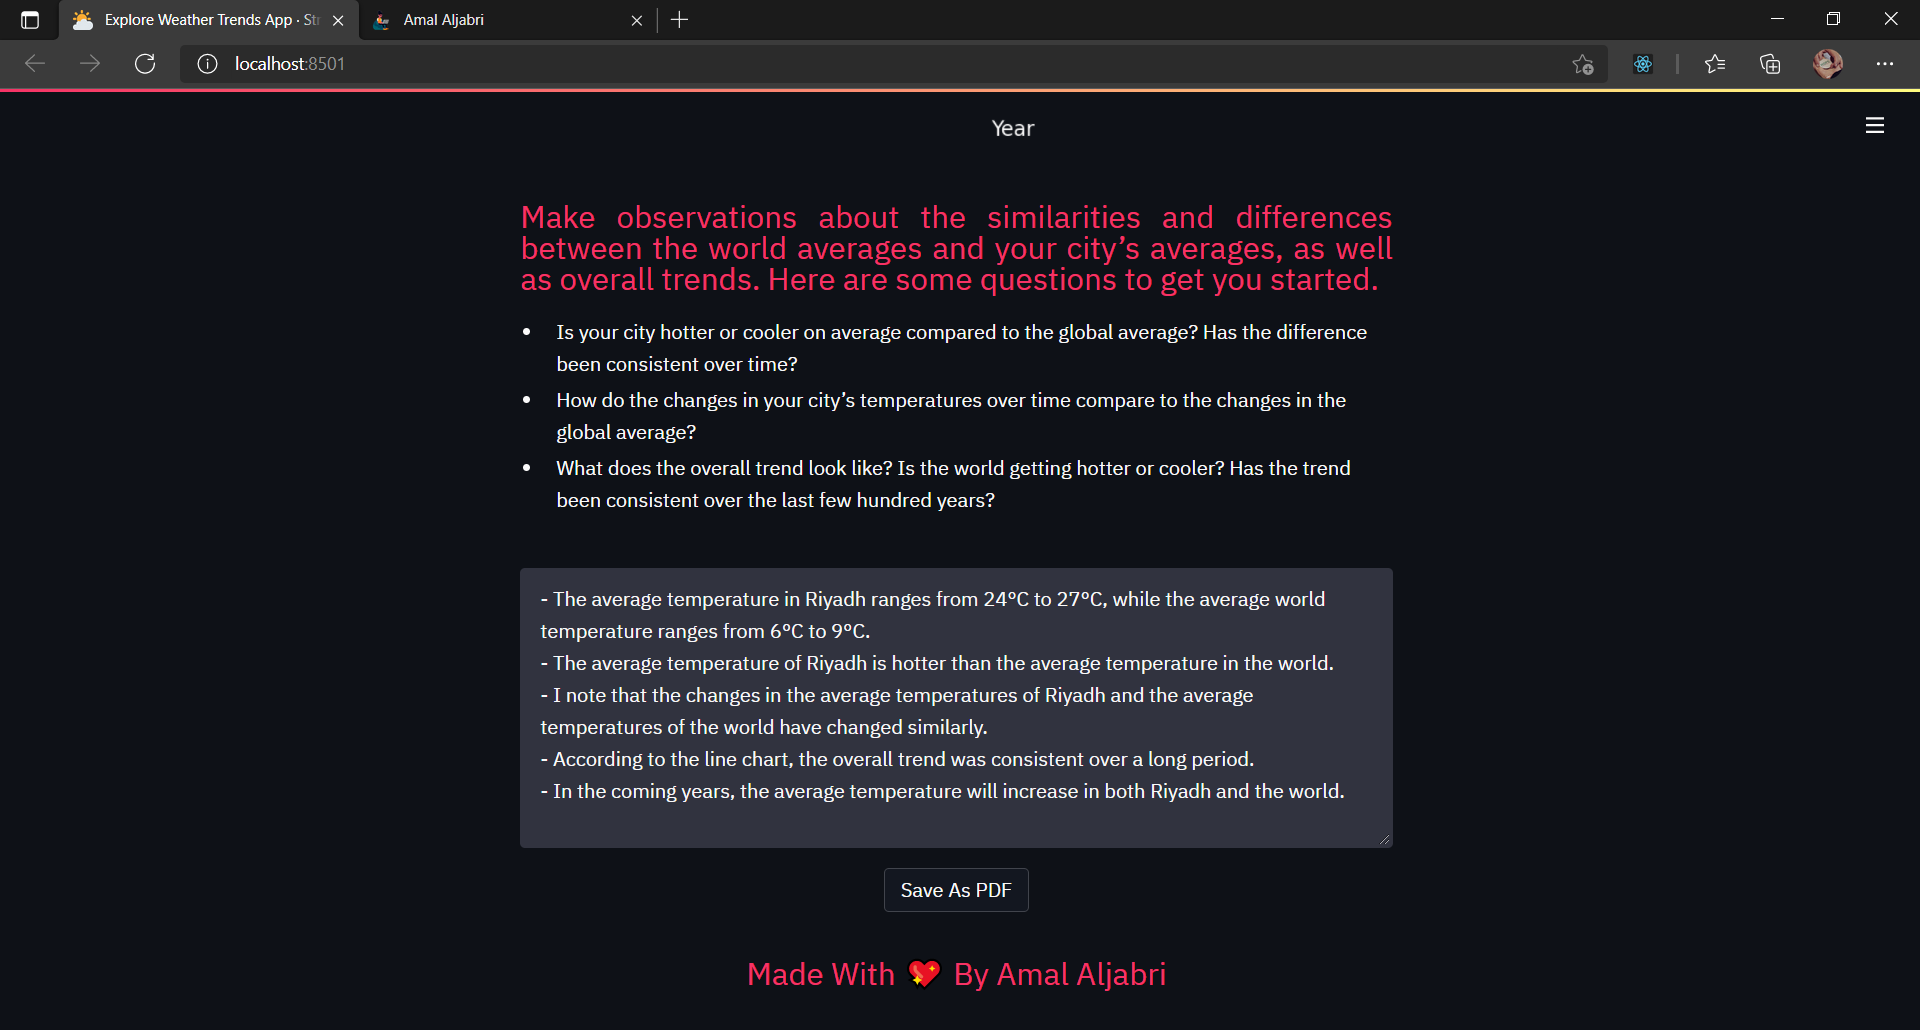

In [13]:
Image(filename='/content/Img_App_5.png', height=400)